LIBRERIAS UTILIZADAS:

In [45]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt

Carga de los ficheros resultado del Web Scraping:

In [46]:
#Creación DataFrame único:

#pd.set_option('display.max_colwidth', 30) #Para visualizar mejor la columna "description"

data20230330s = pd.read_csv('ofertas_data scientist_2023-03-30.csv')
data20230330a = pd.read_csv('ofertas_data analyst_2023-03-30.csv')
data20230316a = pd.read_csv('ofertas_data analyst_2023-03-16.csv')
data20230316s = pd.read_csv('ofertas_data scientist_2023-03-16.csv')
data20230309a = pd.read_csv('ofertas_data analyst_2023-03-09.csv')
data20230309s = pd.read_csv('ofertas_data scientist_2023-03-09.csv')
data20230303s = pd.read_csv('ofertas_data scientist_2023-03-03.csv')
data20230303a = pd.read_csv('ofertas_data analyst_2023-03-03.csv')
data20230223s = pd.read_csv('ofertas_data scientist_2023-02-23.csv')
data20230223a = pd.read_csv('ofertas_data analyst_2023-02-23.csv')
data20230216s = pd.read_csv('ofertas_data scientist_2023-02-16.csv')
data20230216a = pd.read_csv('ofertas_data_analyst_2023-02-16.csv')
df=pd.concat([data20230330s,data20230330a,data20230316a,data20230316s,data20230309a,data20230309s,data20230303s,data20230303a,data20230223s,data20230223a,data20230216s,data20230216a], axis=0)

#Borro memoria
del data20230330s 
del data20230330a 
del data20230316a 
del data20230316s 
del data20230309a 
del data20230309s 
del data20230303s 
del data20230303a 
del data20230223s 
del data20230223a 
del data20230216s
del data20230216a

En este documento, a diferencia del análisis NPL (notebook "Spacy.ipynb"), en el que utilizaba la lematización con la librería Spacy, he decidido trabajar con un diccionario de términos que me interesa destacar. Los términos seleccionados tienen relación directa con los puestos de "Científico de datos" y "analista de datos", y se refieren a aptitudes y tecnologías usualmente requeridas para estos dos puestos de trabajo.

La razón de utilizar este filtro de términos es la misma por la que me decidí a utilizar la lematización, el gran volumen de texto a analizar.

Como se puede observar en el siguiente gráfico, el número de palabras utilizado de media para describir los puestos suele superar las 100 palabras.

<Axes: >

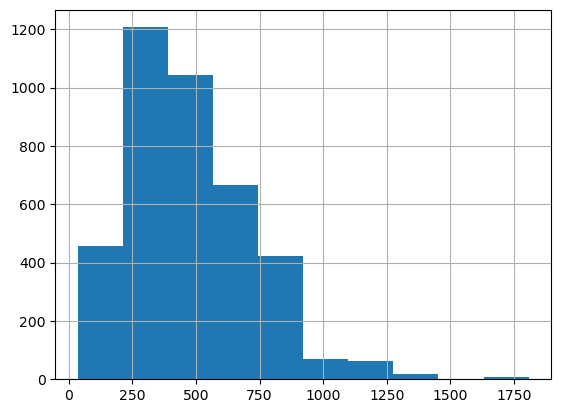

In [47]:
#Número de carácteres
#df['description'].str.len().hist()

#Número de palabras:
df['description'].str.split().str.len().hist()

Mi diccionario de términos se carga de la siguiente manera:

In [48]:
with open("lista_terminos.txt", encoding="utf8") as file: terminos = file.read()

terminos = [word.strip(' ') for word in terminos.split(',')]
terminos = [word.strip('"') for word in terminos]
terminos = list(set(terminos))
terminos[:5] #Primeras 5 palabras

['Ansible',
 'Celery',
 'Cumplimiento de Datos',
 'Especialista en modelado de datos',
 'Seaborn']

Creo la función que me permitirá crear una columna "lista_skills", formada a su vez, para cada registro, con una lista de términos presentes tanto en la oferta analizada como en mi diccionario de términos.

El resultado se muestra un poco más abajo.

In [49]:
#Algunos valores en mi columna df['description'] no son string, luego debo ignorarlos con la siguiente función:
def find_matching_words(text, word_list):
    if text is not None:
        # Convert the value to a string before applying the split method
        text_str = str(text)
        words = text_str.split()
        matching_words = [word for word in words if word in word_list]
        return matching_words
    else:
        return []


# Apply the function to each row of the DataFrame and create a new column called "lista_skills"
df['lista_skills'] = df['description'].apply(lambda x: find_matching_words(x, terminos))


In [50]:
#Para leer el contenido completo con text editor:
#print(df.to_markdown())

Elimino duplicados detro de las listas generadas en mi nueva columna "Lista_skills":

In [52]:
df['lista_skills'] = df['lista_skills'].apply(set) #Elimino duplicados en mis listas de la columna 'lista_skills'
#print(df.iloc[:, ~df.columns.isin(['description'])].to_markdown())
# Elimino duplicados dentro de las listas de la columna 'lista_skills'
remove_lower_dupes = lambda lst: list({s.lower(): s for s in lst}.values())
df['lista_skills'] = df['lista_skills'].apply(remove_lower_dupes)
print(df.iloc[0:8, ~df.columns.isin(['description'])].to_markdown())

|    | job_title                          | company_name                   | company_location                       | work_method   | post_date      | work_time                                  | fecha_scraping   | id_job                                       | lista_skills                                                              |
|---:|:-----------------------------------|:-------------------------------|:---------------------------------------|:--------------|:---------------|:-------------------------------------------|:-----------------|:---------------------------------------------|:--------------------------------------------------------------------------|
|  0 | Data Scientist (Andorra)           | Gauss & Neumann                | Barcelona, Cataluña, España            | Híbrido       | hace 3 semanas | Jornada completa                           | 30/03/2023       | Data Scientist (Andorra)Gauss & Neumann      | ['Engineering', 'English', 'Mathematics']                     

Enumero en una nueva columna ("numero_requisitos") el número de términos destacados para cada una de mis ofertas:

In [53]:
#Crear una nueva columna "numero_requisitos" con el número de términos en la columna 'lista_skills'
df['numero_requisitos'] = df['lista_skills'].apply(len)
print(df.iloc[0:8,df.columns.isin(['lista_skills','numero_requisitos'])].to_markdown())

|    | lista_skills                                                              |   numero_requisitos |
|---:|:--------------------------------------------------------------------------|--------------------:|
|  0 | ['Engineering', 'English', 'Mathematics']                                 |                   3 |
|  1 | ['KPIs']                                                                  |                   1 |
|  2 | ['flexible', 'Java', 'SQL', 'Spark', 'Azure']                             |                   5 |
|  3 | ['SQL', 'Python', 'Matemáticas', 'Tableau', 'IT']                         |                   5 |
|  4 | ['flexible']                                                              |                   1 |
|  5 | ['PySpark', 'Agile', 'KPIs', 'Docker', 'Azure', 'ETL', 'modelling', 'IT'] |                   8 |
|  6 | ['Python', 'Inglés']                                                      |                   2 |
|  7 | ['Engineering', 'English', 'Mathematics']       

El resultado final se ve de con el siguiente ejemplo, en el que busco por ciudad.

In [54]:

df['company_location'] = df['company_location'].fillna('')
df[df['company_location'].str.contains('Tres Cantos')].head(5)


,job_title,company_name,company_location,work_method,post_date,work_time,description,fecha_scraping,id_job,lista_skills,numero_requisitos
313,Management Information Systems Specialist,Newline Interactive EMEA,"Tres Cantos, Comunidad de Madrid, España",Híbrido,hace 4 semanas,Jornada completa · Intermedio,Acerca del empleo\nKey Responsabilities\nWorks...,16/03/2023,Management Information Systems SpecialistNewli...,"[reporting, Tableau, English, Agile]",4
21,Data Analyst,Siemens,"Tres Cantos, Comunidad de Madrid, España",Presencial,hace 1 semana,Jornada completa · Intermedio,Acerca del empleo\nSiemens Mobility is a separ...,03/03/2023,Data AnalystSiemens,"[reporting, Python, R, VBA, modelling]",5
37,Data Analyst,Siemens,"Tres Cantos, Comunidad de Madrid, España",Híbrido,hace 4 días,Jornada completa · Intermedio,Acerca del empleo\nSiemens Mobility is a separ...,03/03/2023,Data AnalystSiemens,"[reporting, Python, R, VBA, modelling]",5
61,Data Analyst,Siemens,"Tres Cantos, Comunidad de Madrid, España",Presencial,hace 3 semanas,Jornada completa · Intermedio,Acerca del empleo\nSiemens Mobility is a separ...,03/03/2023,Data AnalystSiemens,"[reporting, Python, R, VBA, modelling]",5
93,Data Analyst,Siemens,"Tres Cantos, Comunidad de Madrid, España",Híbrido,hace 3 días,Jornada completa · Algo de responsabilidad,Acerca del empleo\nSiemens Mobility is a separ...,03/03/2023,Data AnalystSiemens,"[reporting, Python, R, VBA, modelling]",5


A continuación trataré de extraer el número de años de experiencia que se requiere en cada oferta de empleo.

Buscaré el número más proximo a las palabras 'year', 'years', 'año' y 'años'.

(A lo largo de este proceso tendré que tratar con los campos null)

In [55]:
def obtener_años_experiencia(text):
    pattern = r'\b\d+\s+(year |years |año |años )\b'  # patrón de expresión regular para encontrar el número de años
    match = re.search(pattern, text, re.IGNORECASE)
    if match:
        return match.group(0)
    else:
        return None

In [56]:
df['description'] = df['description'].fillna('')
df['años_de_experiencia'] = df['description'].apply(lambda x: obtener_años_experiencia(x) if re.search(r'\bexperiencia\b', x, re.IGNORECASE) or re.search(r'\bexperience\b', x, re.IGNORECASE) else None)
#print(df.to_markdown()) #Muestra todas las columnas
df['años_de_experiencia'] = df['años_de_experiencia'].fillna('')
df['años_de_experiencia'] = df['años_de_experiencia'].apply(lambda x: re.sub('[^0-9]', '', x)) #elimino las palabras del la columna años_de_experiencia dejando sólo el número de años
#print(df.iloc[:, df.columns.isin(['lista_skills','numero_requisitos','años_de_experiencia'])].to_markdown())

In [57]:
#df1=df.dropna(subset=['numero_requisitos', 'años_de_experiencia'])
df1 = df[df['numero_requisitos'].notna()]
df1 = df1[df1['años_de_experiencia'].notna()]
print(df1.iloc[0:8, df1.columns.isin(['lista_skills','numero_requisitos','años_de_experiencia'])].to_markdown())

|    | lista_skills                                                              |   numero_requisitos | años_de_experiencia   |
|---:|:--------------------------------------------------------------------------|--------------------:|:----------------------|
|  0 | ['Engineering', 'English', 'Mathematics']                                 |                   3 |                       |
|  1 | ['KPIs']                                                                  |                   1 |                       |
|  2 | ['flexible', 'Java', 'SQL', 'Spark', 'Azure']                             |                   5 | 4                     |
|  3 | ['SQL', 'Python', 'Matemáticas', 'Tableau', 'IT']                         |                   5 | 3                     |
|  4 | ['flexible']                                                              |                   1 | 7                     |
|  5 | ['PySpark', 'Agile', 'KPIs', 'Docker', 'Azure', 'ETL', 'modelling', 'IT'] |               

Trato de responder a la siguiente pregunta:

¿Existe alguna correlación entre el número de competencias que son nombradas en estas ofertas de empleo y el número de años de experiencia que se pide en cada una de ellas?


In [58]:
#necesito valores numéricos para realizar cálculos de correlación
#Para tranformar la columna df['numero_requisitos']:
df['numero_requisitos'] = df['numero_requisitos'].astype(int)

#Para transformar la columna df['años_de_experiencia'] en tipo numérico necesito desacerme de strings vacíos (''), con la siguiente formula:
def extraer_numeros(cadena):
    if cadena:
        numeros = re.findall(r'\d+', cadena)
        if numeros:
            return int(''.join(numeros))
    return None

df['años_de_experiencia'] = df['años_de_experiencia'].apply(extraer_numeros)

#Voy a considerar los valores superiores a 10 años de experiencia como atípicos y descartarlos
df.loc[df['años_de_experiencia'] > 10, 'años_de_experiencia'] = None

#Considero que los registros que contengan en el nombre del puesto la palabra "junior" no pueden tener un valor en la columna "años_de_experiencia" > 3, por lo tanto, descartaré los registros que cumplan esta condición.
df['job_title'] = df['job_title'].astype(str)
for i, row in df.iterrows():
    # verificar si la columna 'a' contiene la palabra 'junior' (ignorando mayúsculas y minúsculas) y la columna 'b' es mayor que 3
    if 'junior' in row['job_title'].lower() and row['años_de_experiencia'] > 3:
        # eliminar la columna 'b'
        df.at[i, 'años_de_experiencia'] = None

#A continuación la prueba de correlación
print("Coeficiente de correlación: ", df['numero_requisitos'].corr(df['años_de_experiencia']))
#plt.plot(df['numero_requisitos'],df['años_de_experiencia'])
#plt.show()

Coeficiente de correlación:  -0.03178736516419891


<Axes: xlabel='numero_requisitos', ylabel='años_de_experiencia'>

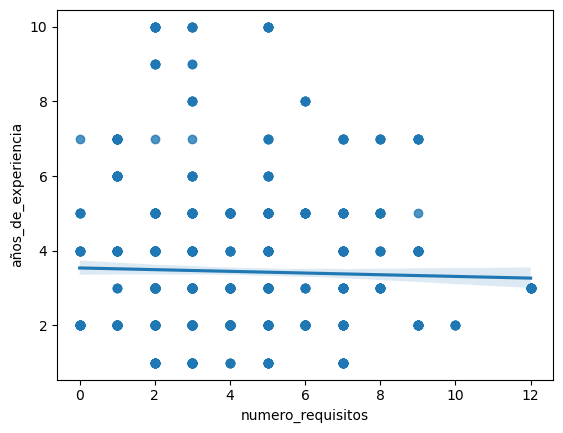

In [59]:
import seaborn as sns

# Equivalente a:
sns.regplot(x = "numero_requisitos", y = "años_de_experiencia", data = df)

Parece que la correlación es menor a la esperada...

Tal vez debería estudiar la diferencia entre los puestos "JUNIOR" y "SENIOR"

In [60]:
df.sort_values('años_de_experiencia', ascending=False).head(5)

,job_title,company_name,company_location,work_method,post_date,work_time,description,fecha_scraping,id_job,lista_skills,numero_requisitos,años_de_experiencia
44,Data Analyst,Publicis Groupe España,"Madrid, Comunidad de Madrid, España",Híbrido,hace 3 semanas,Jornada completa · Intermedio,Acerca del empleo\nLine of Service\n\nAdvisory...,09/03/2023,Data AnalystPublicis Groupe España,"[Matemáticas, Travel, ADE]",3,10.0
304,Senior Data Scientist (d/f/m),Personio,"Madrid, Comunidad de Madrid, España",Presencial,hace 2 días,Jornada completa,Acerca del empleo\nTipo de contrato: Indefinid...,23/02/2023,Senior Data Scientist (d/f/m)Personio,"[flexible, SQL, Agile, Azure, auditoría]",5,10.0
277,Machine Learning Engineer,Capgemini Engineering,España,Híbrido,hace 1 semana,Jornada completa · Intermedio,Acerca del empleo\nJob Description & Summary\n...,16/03/2023,Machine Learning EngineerCapgemini Engineering,"[Matemáticas, ADE]",2,10.0
307,Business Data Analyst,HCLTech,España,En remoto,hace 1 día,Jornada completa · Director,Acerca del empleo\nLine of Service\n\nAdvisory...,09/03/2023,Business Data AnalystHCLTech,"[Matemáticas, Travel, ADE]",3,10.0
1,Consultoría | New Joiners Data & Analytics // ...,PwC España,"Málaga, Andalucía, España",Presencial,hace 2 semanas,Jornada completa · Intermedio,Acerca del empleo\nJob Description & Summary\n...,30/03/2023,Consultoría | New Joiners Data & Analytics // ...,"[Matemáticas, ADE]",2,10.0


In [ ]:
#print(df.sort_values('años_de_experiencia', ascending=False).to_markdown())

In [ ]:
#print(df.sort_values('años_de_experiencia', ascending=False).to_markdown())

In [61]:
print(df.iloc[0:5, df.columns.isin(['lista_skills','numero_requisitos','años_de_experiencia'])].to_markdown())

|    | lista_skills                                      |   numero_requisitos |   años_de_experiencia |
|---:|:--------------------------------------------------|--------------------:|----------------------:|
|  0 | ['Engineering', 'English', 'Mathematics']         |                   3 |                   nan |
|  1 | ['KPIs']                                          |                   1 |                   nan |
|  2 | ['flexible', 'Java', 'SQL', 'Spark', 'Azure']     |                   5 |                     4 |
|  3 | ['SQL', 'Python', 'Matemáticas', 'Tableau', 'IT'] |                   5 |                     3 |
|  4 | ['flexible']                                      |                   1 |                     7 |
